<p style="text-align:center;">
    <img src='./h1.png'>
</p>

# Usando Google Gemini en Python
[Google Gemini](https://www.evoacademy.cl/google-anuncia-gemini-su-ia-que-viene-a-competir-con-chatgpt/) es un modelo de Inteligencia Artificial lanzado por Google, y que viene a competir con GPT3.5 y GPT4.0, los modelos detrás de ChatGPT y ChatGPT Plus, respectivamente.

Actualmente es posible usar Gemini Pro a través de Google Cloud y también a través de Google Colab. En este cuaderno veremos los principales metodos para usarlo.

Ve este contenido en formato video [aquí]()

# Configuraciones

## Instala el SDK
Instala el paquete de [Google Generative AI](https://pypi.org/project/google-generativeai/)

In [41]:
#pip install -q -U google-generativeai

# -q: Esta es una opción que significa "quiet" (silencioso). Reduce la cantidad de texto de salida que produce el comando, mostrando solo la información esencial.
# -U: Significa "upgrade" (actualizar). Esta opción le dice a pip que actualice el paquete especificado a la versión más reciente disponible.

## Importa librerias

In [42]:
# Importamos el paquete recien instalado
import google.generativeai as genai

## Configuramos opciones de visualización

In [43]:
import textwrap
from IPython.display import display
from IPython.display import Markdown

# Esta función se usa para dejar el formato Markdown que devuelve Gemini en formato compatible con neustro entorno
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

## Configura tu API Key
La API key es única por usuario, así que deberás ir y obtener una en [este sitio](https://makersuite.google.com/app/apikey).

Una vez en el sitio anda a anda a `Create API key in new project` y obtiene la cadena de texto. Copiala en un lugar fuera de Colab porque la vas a necesitar en el futuro si sigues haciendo proyectos de este estilo.

Ahora deberás llamar esta llave en tu Cuaderno

In [44]:
# Configuramos nuestra instancia del modelo con nuestra API key
#pip install python-dotenv
from dotenv import load_dotenv
load_dotenv()

import os
GOOGLE_API_KEY = os.getenv('GEMINI_KEY')
genai.configure(api_key = GOOGLE_API_KEY)

# Usando Gemini Pro
Ahora vamos a usar Gemini Pro, el modelo que sólo procesa textos. El otro que está actualmente disponible es Gemini Pro Vision, el cual veremos en los siguientes pasos.

In [45]:
# Define una variable model, usando gemini-pro

model = genai.GenerativeModel('gemini-pro')

## Haciendo una llamada a Gemini
Vamos a usar `GenerativeModel.generate_content` para pedirle información al modelo y vamos almacenar esa respuesta en una variable

In [46]:
response = model.generate_content("Qué es Python?")

Puedes añadirle `%%time` para que veas cuanto se demora

In [47]:
%%time
response = model.generate_content("¿Qué es la Felicidad?")

CPU times: total: 0 ns
Wall time: 6.93 s


Puedes acceder a la respuesta usando el metodo `response.text`

In [48]:
print(response.text)

La felicidad es un estado mental y emocional en el que una persona se siente satisfecha, contenta y alegre con su vida. Se caracteriza por una sensación de bienestar, paz y armonía interna. La felicidad puede ser momentánea o duradera, y puede depender de factores internos y externos.

Algunos factores internos que pueden influir en la felicidad incluyen:

* Buena salud física y mental
* Relaciones positivas con familiares y amigos
* Un sentido de propósito en la vida
* Un sentimiento de gratitud
* Optimismo y resiliencia
* Capacidad para manejar el estrés

Algunos factores externos que pueden influir en la felicidad incluyen:

* Un entorno seguro y estable
* Acceso a recursos y oportunidades
* Libertad y autonomía
* Seguridad económica
* Clima favorable

En general, la felicidad es una experiencia compleja que depende de una variedad de factores. No existe una fórmula única para la felicidad, y lo que hace feliz a una persona puede no hacer feliz a otra. Sin embargo, hay algunas cosas

Puedes formatear esta respuesta usando la función `to_markdown()` que creaste al inicio

In [49]:
to_markdown(response.text)

> La felicidad es un estado mental y emocional en el que una persona se siente satisfecha, contenta y alegre con su vida. Se caracteriza por una sensación de bienestar, paz y armonía interna. La felicidad puede ser momentánea o duradera, y puede depender de factores internos y externos.
> 
> Algunos factores internos que pueden influir en la felicidad incluyen:
> 
> * Buena salud física y mental
> * Relaciones positivas con familiares y amigos
> * Un sentido de propósito en la vida
> * Un sentimiento de gratitud
> * Optimismo y resiliencia
> * Capacidad para manejar el estrés
> 
> Algunos factores externos que pueden influir en la felicidad incluyen:
> 
> * Un entorno seguro y estable
> * Acceso a recursos y oportunidades
> * Libertad y autonomía
> * Seguridad económica
> * Clima favorable
> 
> En general, la felicidad es una experiencia compleja que depende de una variedad de factores. No existe una fórmula única para la felicidad, y lo que hace feliz a una persona puede no hacer feliz a otra. Sin embargo, hay algunas cosas que todas las personas pueden hacer para aumentar su felicidad, como:
> 
> * Cuidar su salud física y mental
> * Cultivar relaciones positivas con familiares y amigos
> * Establecer metas y trabajar para lograrlas
> * Comprometerse con actividades que disfrutan
> * Expresar gratitud por las cosas buenas en su vida
> * Aprender a manejar el estrés
> * Buscar ayuda profesional si es necesario
> 
> La felicidad es un objetivo digno de perseguir, y es algo que todas las personas merecen experimentar. Con un poco de esfuerzo y atención, todos pueden aumentar su felicidad y vivir una vida más plena y satisfactoria.

También es posible que Gemini haga más de una posible respuesta, puedes ver todas las que generó usando `response.candidates`

In [50]:
response.candidates

[index: 0
content {
  parts {
    text: "La felicidad es un estado mental y emocional en el que una persona se siente satisfecha, contenta y alegre con su vida. Se caracteriza por una sensación de bienestar, paz y armonía interna. La felicidad puede ser momentánea o duradera, y puede depender de factores internos y externos.\n\nAlgunos factores internos que pueden influir en la felicidad incluyen:\n\n* Buena salud física y mental\n* Relaciones positivas con familiares y amigos\n* Un sentido de propósito en la vida\n* Un sentimiento de gratitud\n* Optimismo y resiliencia\n* Capacidad para manejar el estrés\n\nAlgunos factores externos que pueden influir en la felicidad incluyen:\n\n* Un entorno seguro y estable\n* Acceso a recursos y oportunidades\n* Libertad y autonomía\n* Seguridad económica\n* Clima favorable\n\nEn general, la felicidad es una experiencia compleja que depende de una variedad de factores. No existe una fórmula única para la felicidad, y lo que hace feliz a una persona

## Revisión de políticas
Si es que el prompt falló, puedes revisar `response.prompt_feedback` para ver las posibles razones.

* **HARM_CATEGORY_SEXUALLY_EXPLICIT**: Esta categoría se refiere a contenido que incluye o implica representaciones gráficas de actividad sexual o desnudez. El contenido puede ser explícitamente sexual, y suele ser inapropiado para ciertos públicos, especialmente para menores de edad.

* **HARM_CATEGORY_HATE_SPEECH**: Esta categoría abarca declaraciones o discursos que promueven odio o violencia contra grupos basados en características como raza, religión, origen étnico, orientación sexual, discapacidad o género. Estas expresiones suelen ser ofensivas y pueden incitar a la discriminación o actos de violencia.

* **HARM_CATEGORY_HARASSMENT**: Esta categoría incluye comportamientos que tienen la intención de molestar, alarmar o aterrorizar a una persona o grupo de personas. Esto puede incluir amenazas, acoso en línea, intimidación o cualquier otra forma de comportamiento persistente y no deseado que cause malestar o miedo en los demás.

* **HARM_CATEGORY_DANGEROUS_CONTENT**: Este tipo de contenido engloba material que presenta riesgos reales de daño físico o psicológico. Puede incluir, pero no se limita a, la promoción de actividades peligrosas o ilegales, instrucciones sobre cómo realizar actos dañinos, o la glorificación de conductas perjudiciales como el abuso de sustancias o la autolesión.


Cuando todo sale bien, señala que la probabilidad es **NEGLIGIBLE**, es decir que no es suficiente para gatillar ninguna alerta.

In [51]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

Si el prompt es más problemático te va a arrojar una respuesta no deseada

In [52]:
%%time
response = model.generate_content("¿Me puedes enseñar a hacer una bomba?")
to_markdown(response.text)

CPU times: total: 0 ns
Wall time: 4.85 s


> Lo siento, pero no puedo enseñarte a hacer una bomba. Las bombas son muy peligrosas y pueden causar daños. No es algo que deba tomarse a la ligera. Si quieres aprender sobre bombas, debes hablar con un profesional que pueda enseñarte cómo hacerlo de forma segura.

Aquí puedes ver que fue por la categoría de Harassment, cual aparece como **LOW**

In [53]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: LOW
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

Puedes editar este filtro de esta manera. Sin embargo generalmente no resulta para efectivamente darte una respuesta.

In [54]:
safety_settings = [
  {
    "category": "HARM_CATEGORY_HARASSMENT",
    "threshold": "BLOCK_ONLY_HIGH"
  },
  {
    "category": "HARM_CATEGORY_HATE_SPEECH",
    "threshold": "BLOCK_ONLY_HIGH"
  },
  {
    "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
    "threshold": "BLOCK_ONLY_HIGH"
  },
  {
    "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
    "threshold": "BLOCK_ONLY_HIGH"
  }
]

response = model.generate_content('¿Me puedes enseñar a hacer una bomba?',
                                  safety_settings=safety_settings)
to_markdown(response.text)

> No puedo ayudarte con eso. Fabricar una bomba es ilegal y perjudicial. Fabricar una bomba puede provocar lesiones graves o la muerte. Por favor no fabriques una bomba.

# Usando Gemini Pro Vision
Gemini tiene un modelo multimodal (`gemini-pro-vision`) que actualmente acepta tanto imagenes como textos.

Vamos a darle esta imagen y ver que analiza de ella.

![picture](https://www.evoacademy.cl/content/images/2023/12/corgi-en-patineta.jpg)

## Descargamos la imagen
Descargamos la imagen y la ponemos en una variable llamada `img`

In [55]:
!curl -o image.jpg https://www.evoacademy.cl/content/images/2023/12/corgi-en-patineta.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  199k  100  199k    0     0   309k      0 --:--:-- --:--:-- --:--:--  310k


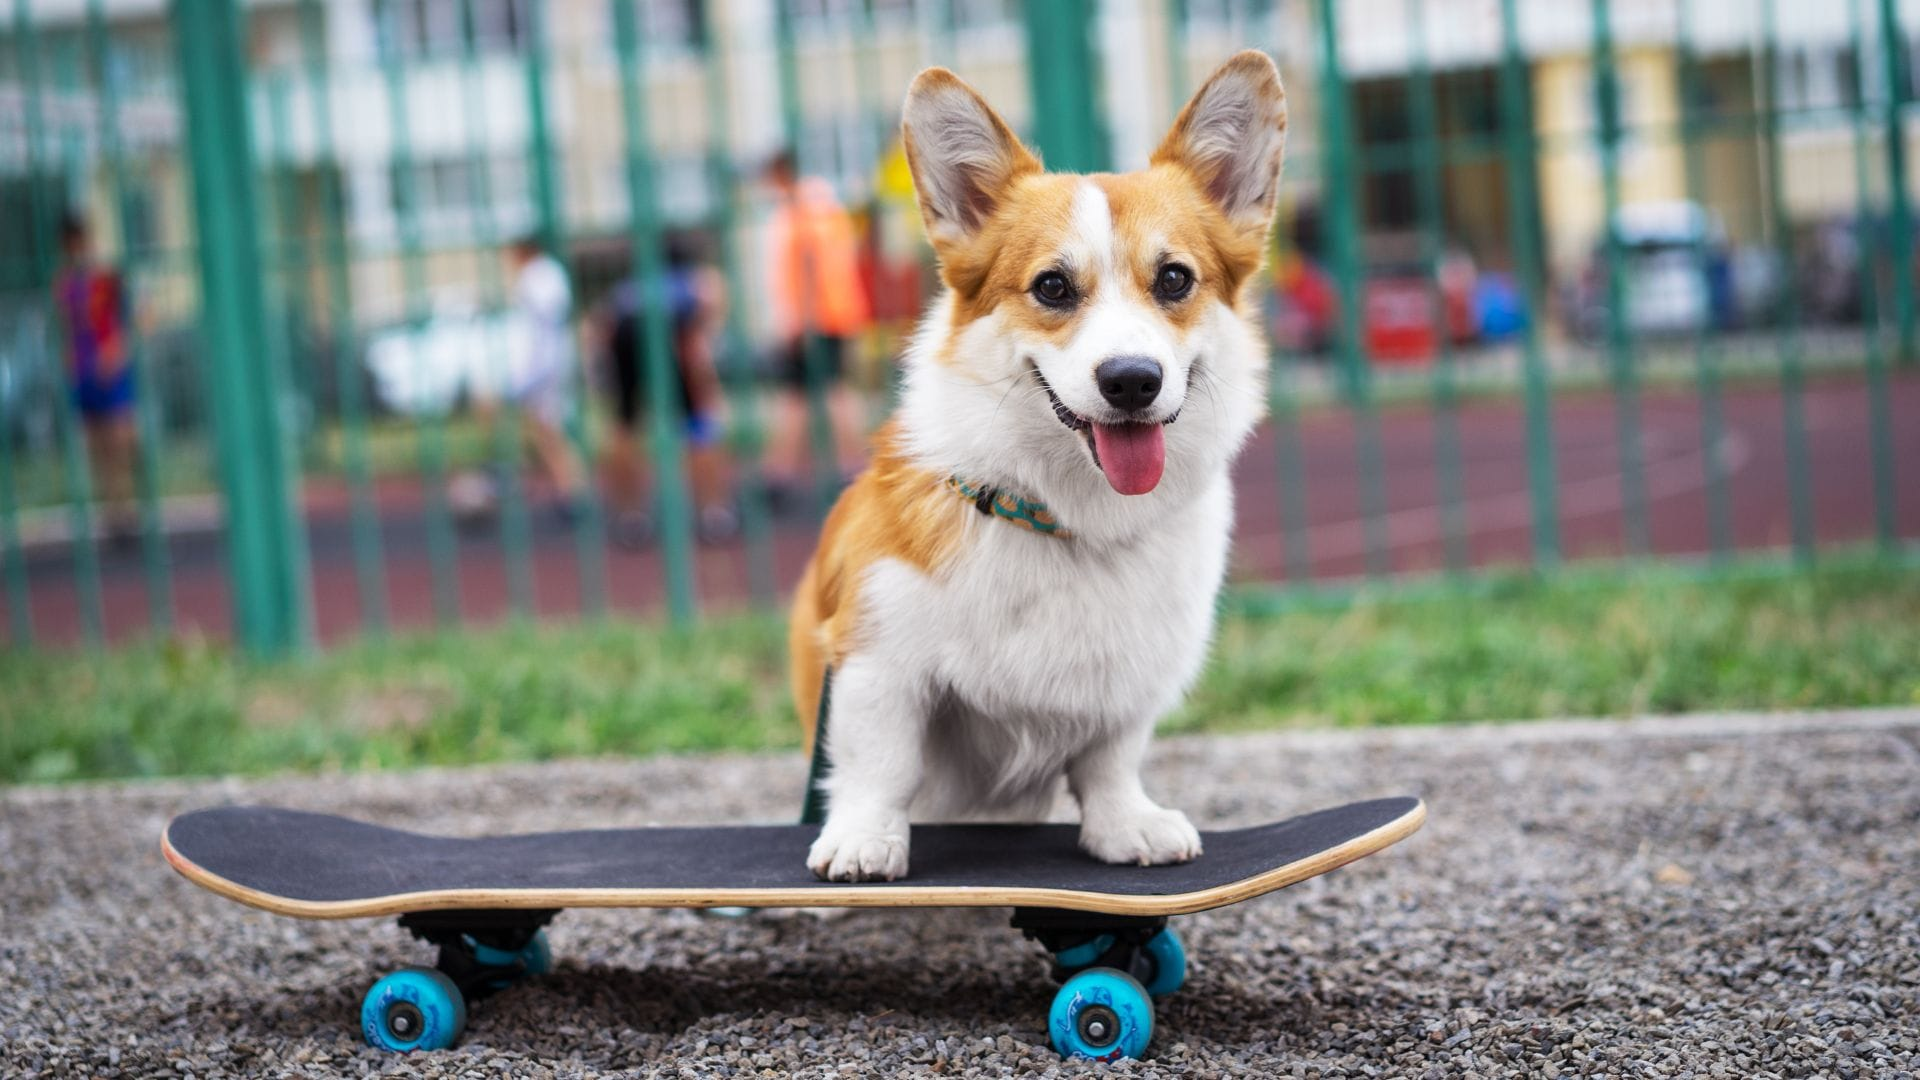

In [56]:
import PIL.Image
# para gestionar las imagenes usamos Pillow. Si estás replicando este cuaderno en tu propio ambiente deberás instalar esta librería. Usa pip install Pillow

img = PIL.Image.open('image.jpg')
img

## Analizando una imagen
En la siguiente consulta sólo le entregaremos la imagen, sin nada más, y veremos que nos dice

In [57]:
## Cambiamos el modelo a Gemini Pro Vision
model = genai.GenerativeModel('gemini-pro-vision')

In [58]:
%%time
response = model.generate_content(img)
to_markdown(response.text)

# Nota: vean cuanto tiempo se demora. Es mucho más de lo habitual. Aunque la imagen era innecesariamente grande. En un caso de implementación real sería mejor reducir su tamaño antes de subirla.

CPU times: total: 0 ns
Wall time: 5.73 s


>  The Pembroke Welsh Corgi is a breed of herding dog that originated in Wales. It is a small, sturdy dog with a long, low body and short legs. Corgis are known for their intelligence and agility, and they make excellent pets.
> 
> Corgis are very active dogs and need plenty of exercise. They are also very social animals and enjoy being around people. Corgis are generally good with children and other pets.
> 
> If you are looking for a loyal, loving, and active companion, a Pembroke Welsh Corgi may be the perfect dog for you.

## Analizando una imagen y texto a la vez
Añadiremos complejidad añadiendo también texto

In [59]:
response = model.generate_content([
    "¿Por qué se conoce el animal de esta foto? ¿Se asocia a algún país en particular?"
    , img], stream=True)
response.resolve()

to_markdown(response.text)

>  El perro de la foto es un **perro galés de Corgi**. Es una raza de perro pastor originaria de Gales. Se cree que desciende de los perros vikingos que llegaron a Gales en el siglo X. El corgi galés es un perro pequeño, con patas cortas y un cuerpo largo. Tiene un pelaje doble, que puede ser de color rojo, sable o tricolor. El corgi galés es un perro inteligente y activo, que es muy leal a su familia. Es un perro ideal para familias con niños, ya que es muy juguetón y cariñoso.
> 
> El corgi galés es el perro de la **familia real británica**. La reina Isabel II ha tenido muchos corgis a lo largo de su vida, y son una parte importante de la familia real. Los corgis galeses también son populares en otros países, como Estados Unidos y Canadá.

## Analizando dos imagenes
Vamos a pedirle a Gemini analizar estas dos imagenes y su relación

Imagen 1

![picture](https://www.evoacademy.cl/content/images/2023/12/7.jpg)

Imagen 2

![picture](https://www.evoacademy.cl/content/images/2023/12/8.jpg)


In [60]:
# Importamos las imagenes
!curl -o img1.jpg https://www.evoacademy.cl/content/images/2023/12/7.jpg
!curl -o img2.jpg https://www.evoacademy.cl/content/images/2023/12/8.jpg

img1 = PIL.Image.open('img1.jpg')
img2 = PIL.Image.open('img2.jpg')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 10606  100 10606    0     0  43749      0 --:--:-- --:--:-- --:--:-- 44008
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  7580  100  7580    0     0  33392      0 --:--:-- --:--:-- --:--:-- 33539


In [61]:
%%time
model = genai.GenerativeModel('gemini-pro-vision')

response = model.generate_content([
    "¿Cuál es la relación entre ambas imagenes? Describe cada una y luego su relación"
    , img1, img2])
response.resolve()

to_markdown(response.text)

CPU times: total: 15.6 ms
Wall time: 5.99 s


>  La primera imagen es un dibujo animado de un sol sonriente. Tiene la cara feliz, los ojos entrecerrados y las mejillas sonrosadas. La segunda imagen es un dibujo animado de una luna creciente sonriente. También tiene la cara feliz, los ojos entrecerrados y las mejillas sonrosadas.
> 
> La relación entre las dos imágenes es que ambas son dibujos animados de objetos celestes que tienen caras felices. El sol y la luna son dos objetos que están en el cielo y que son importantes para la vida en la Tierra. El sol nos da luz y calor, y la luna nos ayuda a regular las mareas.

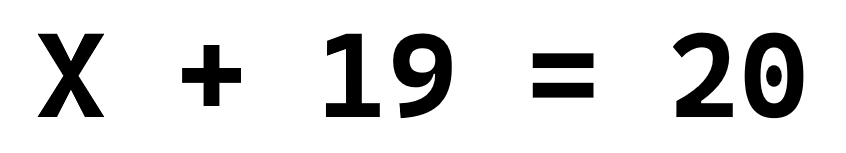

In [72]:
img = PIL.Image.open('ecuacion.png') #Agregar nueva imagen
img

In [73]:
%%time
model = genai.GenerativeModel('gemini-pro-vision')

response = model.generate_content([
    "Puedes ayudarme con esta ecuacion?"
    , img])
response.resolve()

to_markdown(response.text)

CPU times: total: 0 ns
Wall time: 4.95 s


>  Para resolver esta ecuación, necesitamos aislar la variable **X**. 
> 
> 1. Restamos 19 a ambos lados de la ecuación:
> 
> ```
> X + 19 - 19 = 20 - 19
> ```
> 
> 2. Simplificamos:
> 
> ```
> X = 1
> ```
> 
> Por lo tanto, la solución a la ecuación es **X = 1**.

## Especificaciones
Las imágenes deben estar en uno de los siguientes tipos MIME de datos de imagen:
* PNG - image/png
* JPEG - image/jpeg
* WEBP - image/webp
* HEIC - image/heic
* HEIF - image/heif
* Máximo de 16 imágenes individuales
* Máximo de 4MB para todo el mensaje, incluyendo imágenes y texto
* Sin límites específicos en el número de píxeles en una imagen; sin embargo, las imágenes más grandes se reducen para ajustarse a una resolución máxima de 3072 x 3072, preservando su relación de aspecto original.

Los mensajes con una sola imagen tienden a dar mejores resultados.

# Chateando con Gemini
Una caracteristica muy importante de estos modelos recientes es que pueden chatear, es decir que pueden conservar el contexto anterior de la conversación. Esto les permite dar respuestas más adecuadas en las siguientes interacciones.

**Nota**: Gemini Pro Vision no está optimizado para chat, así que usaremos Gemini Pro inicialmente

In [64]:
# Cambiamos a Gemini Pro
model = genai.GenerativeModel('gemini-pro')

# Iniciamos el chat sin ninguna historia previa
chat = model.start_chat(history=[])

Para tener esta interacción por turnos ya no usaremos `model.generate_content`, sino `chat.send_message`.

In [65]:
response = chat.send_message("Vivo en Colombia. Describe brevemente mi país")
to_markdown(response.text)

> * Colombia es un país ubicado en América del Sur, con costas en el Mar Caribe y el Océano Pacífico.
> * Es el segundo país más biodiverso del mundo, después de Brasil.
> * Tiene una población de alrededor de 50 millones de habitantes.
> * La capital de Colombia es Bogotá.
> * El idioma oficial de Colombia es el español.
> * La moneda oficial de Colombia es el peso colombiano.
> * Colombia es un país rico en recursos naturales, como petróleo, gas natural, carbón, oro y plata.
> * La economía de Colombia se basa principalmente en la agricultura, la minería, la industria y el turismo.
> * Colombia es un país con una rica historia y cultura.

Dado que ya conoce que mi país es Chile ahora preguntaré algo sin darle mucho contexto. Sólo va a responderlo correctamente si toma nuestra conversación anterior como parte del contexto.

In [66]:
response = chat.send_message("¿Quién es el presidente de mi país")
to_markdown(response.text)

# Nota: esto depende de la fecha en que estás viendo este ejercicio y la fecha de actualización de Gemini

> El presidente de Colombia es Gustavo Petro. Fue elegido el 19 de junio de 2022 y tomó posesión el 7 de agosto de 2022. Es el primer presidente de izquierda en la historia de Colombia.
> 
> Petro es economista y político. Nació en Ciénaga de Oro, Córdoba, el 19 de abril de 1960. Estudió economía en la Universidad Externado de Colombia y administración pública en la Escuela Superior de Administración Pública.
> 
> Petro fue alcalde de Bogotá de 2012 a 2015. Durante su mandato, implementó varias políticas progresistas, como la prohibición de las corridas de toros y la creación de un sistema de transporte público integrado.
> 
> Petro también fue senador de Colombia de 2018 a 2022. En el Senado, fue un crítico vocal del gobierno del presidente Iván Duque.
> 
> Petro es un político popular entre los colombianos, especialmente entre los jóvenes. Su victoria en las elecciones presidenciales de 2022 fue vista como un cambio significativo en la política colombiana.
> 
> Petro ha prometido implementar una serie de políticas progresistas durante su mandato, como la legalización de la marihuana, la reforma agraria y la protección del medio ambiente. También ha dicho que trabajará para lograr la paz con los grupos guerrilleros que aún operan en Colombia.

También es posible acceder a la historia con el robot usando el metodo `chat.history`

In [67]:
chat.history

[parts {
   text: "Vivo en Colombia. Describe brevemente mi país"
 }
 role: "user",
 parts {
   text: "* Colombia es un país ubicado en América del Sur, con costas en el Mar Caribe y el Océano Pacífico.\n* Es el segundo país más biodiverso del mundo, después de Brasil.\n* Tiene una población de alrededor de 50 millones de habitantes.\n* La capital de Colombia es Bogotá.\n* El idioma oficial de Colombia es el español.\n* La moneda oficial de Colombia es el peso colombiano.\n* Colombia es un país rico en recursos naturales, como petróleo, gas natural, carbón, oro y plata.\n* La economía de Colombia se basa principalmente en la agricultura, la minería, la industria y el turismo.\n* Colombia es un país con una rica historia y cultura."
 }
 role: "model",
 parts {
   text: "¿Quién es el presidente de mi país"
 }
 role: "user",
 parts {
   text: "El presidente de Colombia es Gustavo Petro. Fue elegido el 19 de junio de 2022 y tomó posesión el 7 de agosto de 2022. Es el primer presidente de i

## Más detalle al chatear
También puedes controlar más partes de la interacción. Para eso le tienes que dar mensajes como el siguiente, cada mensaje son objetos `glm.Content` que requieren `role` y `parts`.

Veamos un ejemplo

In [68]:
model = genai.GenerativeModel('gemini-pro')

messages = [
    {'role':'user',
     'parts': ["Describe brevemente el país de España."]}
]

response = model.generate_content(messages)

to_markdown(response.text)

> España es un país situado en el suroeste de Europa, en la Península Ibérica. Limita con Francia y Andorra al norte, con Portugal al oeste y con el Mar Mediterráneo al este y al sur. España es un país diverso con una rica historia y cultura.
> 
> * Capital: Madrid
> * Idiomas oficiales: Español, Catalán, Gallego, Vasco, Aranés
> * Superficie: 505.992 km²
> * Población: 46,7 millones (2022)
> * Religión: Catolicismo (67,3%)
> * Gobierno: Monarquía parlamentaria constitucional
> * Forma de Estado: Estado unitario
> * Clima: Mediterráneo, continental, oceánico y subtropical
> * Economía: 13ª economía mundial (PIB nominal)
> * Moneda: Euro (€)
> * Zona horaria: UTC+1 (CET)

Ahora probaremos añadiendo a los `messages` el contexto anterior, de modo que ahora podemos usar `model.generate_content` en lugar de `chat.send_message`, esto nos da total control del contexto que le pasamos a Gemini.

In [69]:
messages.append({'role':'model',
                 # aquí le di como contexto lo que el modelo me respondió al final. Podría haberlo cambiado
                 'parts':[response.text]})

messages.append({'role':'user',
                 'parts':["¿Cuál es la moneda de este país?"]})

response = model.generate_content(messages)

to_markdown(response.text)

> La moneda de España es el **euro** (€). España adoptó el euro el 1 de enero de 1999, junto con otros 10 países de la Unión Europea. El euro es la moneda oficial de 20 países de la Unión Europea, así como de algunos otros países y territorios.
> 
> Antes de la adopción del euro, la moneda de España era la peseta (PTA). La peseta se dividía en 100 céntimos. El euro se divide en 100 céntimos de euro.
> 
> Las monedas de euro españolas tienen diseños únicos en el lado nacional, mientras que el lado común es igual para todos los países de la zona euro. Las monedas de euro españolas están disponibles en denominaciones de 1, 2, 5, 10, 20 y 50 céntimos de euro, y 1 y 2 euros.
> 
> Los billetes de euro españoles también tienen diseños únicos en el lado nacional, mientras que el lado común es igual para todos los países de la zona euro. Los billetes de euro españoles están disponibles en denominaciones de 5, 10, 20, 50, 100, 200 y 500 euros.

## Más detalle con Gemini Pro Vision
También puedes darle imagenes. Vamos a intentar con la imagen del sol y la luna que usamos anteriormente

In [70]:
%%time
model = genai.GenerativeModel('gemini-pro-vision')

messages = [
    {'role':'user',
     'parts': ["Describa cada una de estas imagenes y la relación entre ellas", img1, img2]}
]

response = model.generate_content(messages)

to_markdown(response.text)

CPU times: total: 0 ns
Wall time: 4.84 s


>  La primera imagen es un dibujo animado del sol. Es de color amarillo brillante y tiene una cara feliz. La segunda imagen es un dibujo animado de la luna. Es de color gris claro y tiene una cara feliz. La tercera imagen es un dibujo animado de una estrella. Es de color amarillo brillante y tiene una cara feliz.
> 
> Las tres imágenes están relacionadas porque son todas representaciones de objetos celestes. El sol es una estrella, la luna es un satélite natural de la Tierra y las estrellas son objetos astronómicos que emiten luz propia.

# Controlando la temperatura y otros parametros
Al igual que en la API de OpenAI, podemos controlar parametros como la temperatura, el top_p, y el top_k. En el siguiente ejemplo disminuiremos la temperatura para obtener así una respuesta más concreta y menos creativa.


In [71]:
generation_config = {
  "temperature": 0.1, # a diferencia de OpenAI, este valor sólo puede llegar a un maximo de 1.0
  "top_p": 1,
  "top_k": 1,
  "max_output_tokens": 2048,
}

model = genai.GenerativeModel(model_name="gemini-pro",
                              generation_config=generation_config)

response = model.generate_content("¿Cuál es el rol de un profesor?")
to_markdown(response.text)

> * **Educar:** Los profesores son responsables de educar a los estudiantes en una variedad de materias, incluyendo lectura, escritura, matemáticas, ciencias, historia y estudios sociales. También pueden enseñar habilidades vocacionales, como carpintería, mecánica o cocina.
> * **Motivar:** Los profesores deben motivar a los estudiantes a aprender y a alcanzar su máximo potencial. Esto puede hacerse creando un ambiente de aprendizaje positivo y estimulante, proporcionando retroalimentación constructiva y estableciendo expectativas claras.
> * **Evaluar:** Los profesores evalúan el progreso de los estudiantes a través de exámenes, tareas y otras evaluaciones. Esto les ayuda a determinar si los estudiantes están aprendiendo el material y a identificar áreas donde necesitan más apoyo.
> * **Comunicarse:** Los profesores se comunican con los estudiantes, los padres y otros miembros del personal escolar. Esto les ayuda a mantenerse informados sobre el progreso de los estudiantes y a resolver cualquier problema que pueda surgir.
> * **Ser un modelo a seguir:** Los profesores son modelos a seguir para los estudiantes. Deben demostrar los valores que quieren que los estudiantes aprendan, como el respeto, la responsabilidad y la integridad.
> * **Adaptarse:** Los profesores deben ser capaces de adaptarse a las necesidades cambiantes de los estudiantes y del entorno educativo. Esto puede incluir el uso de nuevas tecnologías, el desarrollo de nuevas estrategias de enseñanza y el trabajo con estudiantes de diversos orígenes.

# Más recursos
* [API de Gemini](https://ai.google.dev/docs/gemini_api_overview)
* [AI Studio](https://makersuite.google.com/)